## Machine Learning Assignment 4 Coding Part

This Jupyter Notebook contains the coding part of Assignment 4. Please enter your name and student ID here:

- Name: Jingquan Li
- StudentID: 119010148

### Overview

In the coding part of Assignment 4, you'll complete the following four tasks:

- **Task 1**: Implement $k$​​​-means.
- **Task 2**: Implement $k$-means++ initialization.
- **Task 3**: Implement a Gaussian Mixture Model.

The following code is incomplete, and you are required to fill in the missing parts. Please feel free to define your own functions or modify the functions given if needed. You may not use off-the-shelf libraries for all three tasks.

### Data Format

We will be working with a toy dataset with features in $\mathbb R^2$. Before you begin, download the following files.
- `train.txt` the training set, containing 4800 samples.
- `dev.txt` the development set, containing 800 samples.

Each line of the files stores a sample in the format `feature_1,feature_2`.

In [234]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from numpy import ndarray
from typing import Tuple, Union, Type, Dict

In [235]:
def read_file(file_path: str, types: Tuple[Type, ...]) -> Tuple[ndarray, ...]:
    """Read a text file with lines containing comma separated numerical values.
    Args:
        file_path (str): The file path.
        types (Tuple[Type]): The types of each column, for example, (float, float, int).
    Returns:
        columns (Tuple[ndarray, ...]): Numpy arrays of shape [N_lines].
    """
    with open(file_path, "r") as f:
        items = [line.strip().split(",") for line in f.readlines()]
        items = [tuple(type(e) for type, e in zip(types, t)) for t in items]
    columns = list(zip(*items))
    return tuple(np.asarray(c) for c in columns)

# Load the dataset from files
train_x1, train_x2 = read_file("train.txt", (float, float))
train_x = np.stack((train_x1, train_x2), axis=1)
dev_x1, dev_x2 = read_file("dev.txt", (float, float))
dev_x = np.stack((dev_x1, dev_x2), axis=1)

### Visualization of the Training Set

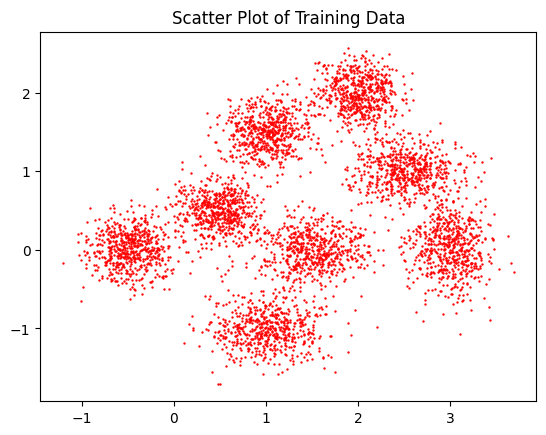

In [236]:
plt.scatter(train_x[:, 0], train_x[:, 1], c="red", s=0.5)
plt.title("Scatter Plot of Training Data")
plt.show()

### Task 1: Implement $k$-means

For $\mathbf x \in \mathbb R^D$ and finite set $\mathcal C \subset \mathbb R^D$ define $d(\mathbf x, \mathcal C) := \min_{\mathbf c \in \mathcal C} \|\mathbf x - \mathbf c\|_2$.

For finite set $\mathcal X \subset \mathbb R^D$ and finite set $\mathcal C \subset \mathbb R^D$ define $\phi(\mathcal X, \mathcal C) := \sum_{\mathbf x \in \mathcal X} d^2(\mathbf x, \mathcal C)$.

Given $\mathcal X = \{\mathbf x_1, \cdots, \mathbf x_N\} \subset \mathbb R^D$, $k$-means optimizes $\mathcal C \subset \mathbb R^D$, where $|\mathcal C| = K$, to minimize the following loss:
$$
\mathcal L(\mathcal C) = \phi(\mathcal X, \mathcal C) = \sum_{\mathbf x \in \mathcal X} \min_{\mathbf c \in \mathcal C} \|\mathbf x - \mathbf c\|_2^2
$$

#### Subtasks
1. Implement the `solve_k_means()` function in the following code block.
2. Plot the loss $\mathcal L$ as a function the number of updates to $\mathcal C$.
3. Generate a scatter plot of the training samples and cluster centers, after $k$-means converges to a **global minimum**.
4. Run $k$-means multiple times. How frequently does the algorithm converge to a global minimum?

In [237]:
def compute_wcss(points, centroids):
    """Compute the within-cluster sum of squares (WCSS)."""
    loss = 0
    for point in points:
        # Calculate the distance from each point to its nearest centroid and square it
        nearest_centroid_distance = np.min(np.sum((centroids - point) ** 2, axis=1))
        loss += nearest_centroid_distance
    return loss

In [238]:
def solve_k_means(x: ndarray, c: ndarray, *, max_step: int=10000):
    """K-means solver. Given K initial cluster centers, update c iteratively.
    Note:
        - You may change the function signature.
        - Please try your best to write vectorized code (i.e. avoid for loops over indices).
        - Design some criterion for stopping the iteration.
    Args:
        x (ndarray[float]): shape [N, D], storing N data samples. D is the feature dimension.
        c (ndarray[float]): shape [K, D], storing K initial cluster centers.
        max_step (int): Maximum number of steps in $k$-means iteration.
    Returns:
        c (ndarray[float]): shape [K, D], updated K cluster centers after iterations.
        index (ndarray[int]): shape [N], the index of the nearest cluster center of
            each sample, in range {0, ..., K - 1}.
    """
    # Initialize variables
    N, D = x.shape
    K = c.shape[0]
    index = np.zeros(N, dtype=int)
    losses = []

    for step in range(max_step):
        # Step 1: Assign each data point to the nearest cluster center
        dists = np.linalg.norm(x[:, np.newaxis, :] - c, axis=2)  # Compute distances
        index = np.argmin(dists, axis=1)  # Assign each point to the nearest centroid

        # Step 2: Update cluster centers
        new_c = np.array([x[index == k].mean(axis=0) for k in range(K)])

        # Compute the loss
        current_loss = compute_wcss(x, new_c)
        losses.append(current_loss)

        # Step 3: Check for convergence
        if np.allclose(c, new_c):  # Check if cluster centers have converged
            break

        # Update cluster centers
        c = new_c

    return c, index, losses
    ##############################################################
    # TODO: Enter your code here                                 #
    ##############################################################

In [239]:
# Random (standard Normal) initialization:
def standard_normal_initialization(K: int) -> ndarray:
    """Standard normal initialization of K cluster centers.
    Args:
        K (int): number of cluster centers.
    Returns:
        c (ndarray): shape [K, 2], K initial cluster centers.
    """
    return np.random.randn(K, 2)

In [246]:
init_c = standard_normal_initialization(8)
updated_c, index, losses = solve_k_means(train_x, init_c, max_step=1000)


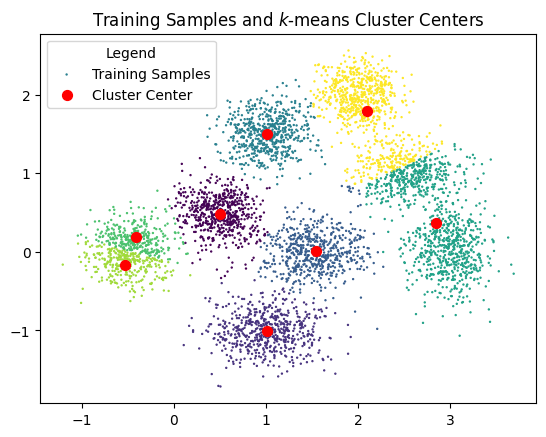

In [247]:
# Plot out the training samples and the cluster centers.
plt.scatter(train_x[:, 0], train_x[:, 1], c=index, s=0.5, label="Training Samples")
plt.scatter(updated_c[:, 0], updated_c[:, 1], c="red", s=50, label="Cluster Center", marker="o")

plt.legend(title="Legend")
plt.title("Training Samples and $k$-means Cluster Centers")
plt.show()

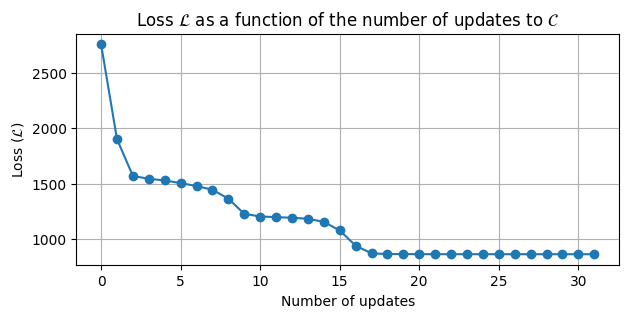

In [251]:
# Plot the loss over iterations
plt.figure(figsize=(7, 3))
plt.plot(losses, marker='o')
plt.xlabel('Number of updates')
plt.ylabel('Loss ($\\mathcal{L}$)')
plt.title('Loss $\mathcal{L}$ as a function of the number of updates to $\mathcal{C}$')
plt.grid(True)
plt.show()

In [147]:
num_runs = 10
converge_count = 0
init_c = standard_normal_initialization(8)
for _ in range(num_runs):
    # Run k-means with random initialization:
    updated_c, index, losses = solve_k_means(train_x, init_c, max_step=1000)
    if np.allclose(init_c, updated_c):
        converge_count += 1
    init_c = updated_c

freq = converge_count / num_runs
print(freq)

0.9


### Task 2: Implement $k$-means++

$k$-means is sensitive to its initialization, and a random initialization of $\mathbf c$ often results in convergence to a local minimum. $k$-means++ is an improved initialization method that often leads to better convergence. Read more about it in [Scalable K-Means++](https://theory.stanford.edu/~sergei/papers/vldb12-kmpar.pdf).

**(Algorithm)** Given $\mathcal X$, $k$-means++ generates a set of $k$ vectors $\mathcal I$ in $\mathbb R^D$ using the following steps:
1. First, randomly pick a sample $\mathbf x$ from $\mathcal X$. And set $\mathcal I := \{\mathbf x\}$.
2. While $|\mathcal I| < k$. Sample $\mathbf x \in \mathcal X$ with probability $p(\mathbf x) := d^2(\mathbf x, \mathcal I) / \phi(\mathcal X, \mathcal I)$. And add the sampled $\mathbf x$ to set $\mathcal I$.

#### Subtasks
1. Implement $k$-means++ initialization algorithm.
2. Compare the loss $\mathcal L$ after convergence with standard normal initialization and $k$-means++ initialization.
3. Compare the convergence speed with random and $k$-means++ initialization.

In [248]:
def k_means_pp_initialization(x: ndarray, K: int) -> ndarray:
    """K-means++ initialization method.
    Args:
        x (ndarray): shape [N, D], storing N data samples. D is the feature dimension.
        K (int): Number of cluster centers.
    Returns:
        c (ndarray): shape [K, D], K initial cluster centers generated by K-means++.
    """
    n_samples, n_features = x.shape
    centers = np.empty((K, n_features), dtype=np.float64)
    
    # Step 1: Randomly select the first center
    first_center_idx = np.random.randint(0, n_samples)
    centers[0] = x[first_center_idx]
    
    # Step 2: Initialize array to store distances
    closest_dist_sq = np.full(n_samples, np.inf)
    
    # Step 3: Iterate to choose remaining centers
    for j in range(1, K):
        # Update the distance from each point to the closest center
        dist_sq = np.linalg.norm(x - centers[j-1], axis=1)**2
        closest_dist_sq = np.minimum(closest_dist_sq, dist_sq)
        
        # Calculate the probabilities for each point
        probabilities = closest_dist_sq / closest_dist_sq.sum()
        cumulative_probabilities = probabilities.cumsum()
        
        # Choose a new center based on weighted probabilities
        r = np.random.rand()
        new_center_idx = np.searchsorted(cumulative_probabilities, r)
        centers[j] = x[new_center_idx]
    
    return centers
    ##############################################################
    # TODO: Enter your code here                                 #
    ##############################################################

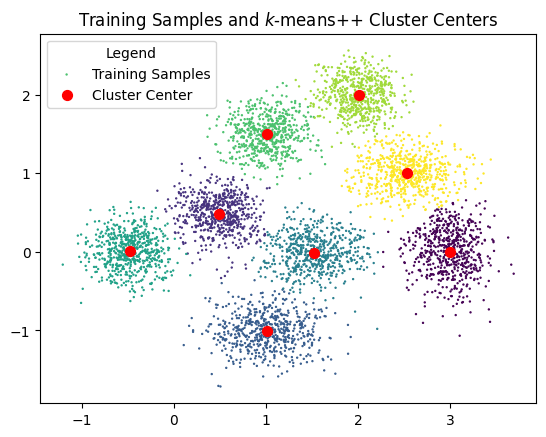

In [249]:
# Initialize the cluster centers with k-means++, then do k-means updates.
init_c = k_means_pp_initialization(train_x, 8)
updated_c, index, losses_pp = solve_k_means(train_x, init_c, max_step=1000)

# Plot out the training samples and the cluster centers.
plt.scatter(train_x[:, 0], train_x[:, 1], c=index, s=0.5, label="Training Samples")
plt.scatter(updated_c[:, 0], updated_c[:, 1], c="red", s=50, label="Cluster Center", marker="o")

plt.legend(title="Legend")
plt.title("Training Samples and $k$-means++ Cluster Centers")
plt.show()

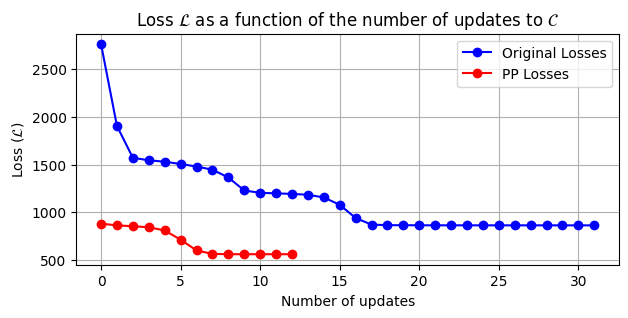

In [250]:
plt.figure(figsize=(7, 3))
plt.plot(losses, marker='o', label='Original Losses', color='blue')  # 第一个曲线图，用蓝色表示
plt.plot(losses_pp, marker='o', label='PP Losses', color='red')  # 第二个曲线图，用红色表示
plt.xlabel('Number of updates')
plt.ylabel('Loss ($\\mathcal{L}$)')
plt.title('Loss $\mathcal{L}$ as a function of the number of updates to $\mathcal{C}$')
plt.grid(True)
plt.legend()  # 添加图例说明
plt.show()

### Task 3: Implement a Gaussian Mixture Model

In this task, you will implement the Expectation-Maximization (EM) algorithm for learning a Gaussian Mixture Model (GMM). Our GMM in $\mathbb R^2$ has a density given by:

$$
p(x) = \sum_{k = 1}^K \pi_k \mathcal N(x| \mu_k, \Sigma_k), \quad \mu_k \in \mathbb R^2, \quad \Sigma_k \in \mathbb R^{2 \times 2}
$$

#### Subtasks
1. Implement EM algorithm. Hint: initialize the Gaussian means with $k$-means++ for better convergence.
2. Use the provided `plot_gmm_contour` function to generate a 2D contour plot of the GMM density $p(x)$ after the log likelihood convergence to a global maximum. You may use `gmm_log_prob` to compute log probability of the GMM.
3. Report the log-likelihood on the training set and development set.

In [ ]:
raise NotImplementedError()
##############################################################
# TODO: Enter your code here                                 #
##############################################################

In [263]:
import numpy as np
from scipy.stats import multivariate_normal

class GaussianMixtureModel:
    def __init__(self, n_components, n_iter, tol):
        self.n_components = n_components
        self.n_iter = n_iter
        self.tol = tol
        self.means = None
        self.init_means = None
        self.weights = None
        self.covariances = None
        self.responsibilities = None

    def initialize_parameters(self, X):
        # Use the custom k_means_pp_initialization function for setting initial means
        self.means = k_means_pp_initialization(X, self.n_components)
        self.init_means = self.means
        self.weights = np.full(self.n_components, 1 / self.n_components)
        self.covariances = np.array([np.cov(X.T) for _ in range(self.n_components)])

    def e_step(self, X):
        self.responsibilities = np.zeros((X.shape[0], self.n_components))
        for k in range(self.n_components):
            self.responsibilities[:, k] = self.weights[k] * multivariate_normal.pdf(X, self.means[k], self.covariances[k])
        self.responsibilities /= self.responsibilities.sum(axis=1, keepdims=True)

    def m_step(self, X):
        n_k = self.responsibilities.sum(axis=0)
        self.weights = n_k / X.shape[0]
        self.means = np.dot(self.responsibilities.T, X) / n_k[:, np.newaxis]
        for k in range(self.n_components):
            x_centered = X - self.means[k]
            self.covariances[k] = np.dot(self.responsibilities[:, k] * x_centered.T, x_centered) / n_k[k]

    def fit(self, X):
        self.initialize_parameters(X)
        log_likelihood = 0
        for _ in range(self.n_iter):
            self.e_step(X)
            self.m_step(X)
            new_log_likelihood = self.compute_log_likelihood_init(X)
            if abs(new_log_likelihood - log_likelihood) <= self.tol:
                break
            log_likelihood = new_log_likelihood

    def compute_log_likelihood_init(self, X):
        log_likelihood = 0
        for k in range(self.n_components):
            log_likelihood += self.weights[k] * multivariate_normal(self.means[k], self.covariances[k]).logpdf(X)
        return np.sum(log_likelihood)
    
    def compute_log_likelihood(self, X):
        return gmm_log_prob(x=X, pi=self.weights, mu=self.means, sigma=self.covariances)
    
    def plot(self, X):
        return plot_gmm_contour(x=X, pi=self.weights, mu=self.means, sigma=self.covariances)

In [264]:
def gmm_log_prob(x: ndarray, pi: ndarray, mu: ndarray, sigma: ndarray) -> ndarray:
    """Batched computation of GMM log probability.
    Arg:
        x (ndarray): [..., 2]. Each sample is a vector in R^2.
        pi (ndarray): [K], mixture weights in the GMM, pi.sum() = 1.
        mu (ndarray): [K, 2], means of Gaussian components.
        sigma (ndarray): [K, 2, 2], covariance matrix of Gaussian components.
            Each sigma[k] must be symmetric positive definite.
    Returns:
        log_prob (ndarray): [...]. The log probability of each vector in x.
            Has the same shape as x after removing the last dimension of x.
    """
    mix = torch.distributions.Categorical(probs=torch.as_tensor(pi))
    normals = torch.distributions.MultivariateNormal(
        loc=torch.as_tensor(mu), covariance_matrix=torch.as_tensor(sigma)
    )
    gmm = torch.distributions.MixtureSameFamily(mix, normals)
    return gmm.log_prob(torch.as_tensor(x)).numpy()

In [265]:
def plot_gmm_contour(x: ndarray, pi: ndarray, mu: ndarray, sigma: ndarray) -> None:
    """Generate a contour plot of the GMM probability, overlapped with a scatter plot
        of the samples in x.
    Args:
        x (ndarray): [N, 2].
        pi (ndarray): [K], mixture weights in the GMM, pi.sum() = 1.
        mu (ndarray): [K, 2], means of Gaussian components.
        sigma (ndarray): [K, 2, 2], covariance matrix of Gaussian components.
            Each sigma[k] must be symmetric positive definite.
    """
    grid_1 = np.arange(-1.5, 4, 0.01)  # [Gx]
    grid_2 = np.arange(-2, 3, 0.01)  # [Gy]
    grid_11, grid_22 = np.meshgrid(grid_1, grid_2, indexing="ij")  # [Gx, Gy]
    grid_12 = np.stack([grid_11, grid_22], axis=-1)  # [Gx, Gy, 2]
    
    grid_logp = gmm_log_prob(grid_12, pi, mu, sigma)  # [Gx, Gy, 2]

    # Plot the contour
    plt.figure(figsize=(7, 4))
    plt.contour(grid_1, grid_2, np.exp(grid_logp.transpose()), levels=10, cmap='viridis')
    plt.scatter(x[:, 0], x[:, 1], c="red", s=0.1, label="Training Samples")
    plt.scatter(mu[:, 0], mu[:, 1], c="black", s=50, label="Gaussian Means")
    plt.legend()  # Add legend
    plt.title("Contour Plot of GMM Probability with Training Samples")
    plt.colorbar()
    plt.show()

In [266]:
model = GaussianMixtureModel(n_components=8, n_iter=10000, tol=1e-4)
model.fit(train_x)

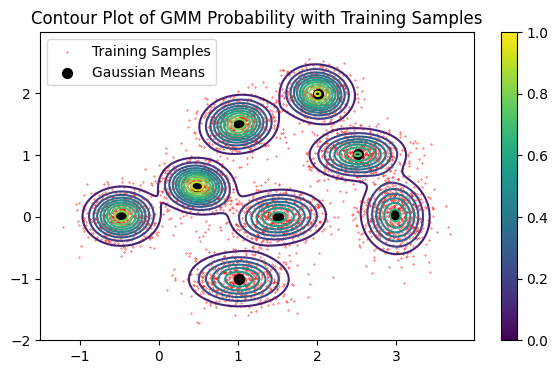

In [267]:
model.plot(train_x)

In [268]:
train_set_log_prob = model.compute_log_likelihood(train_x)
print("Traning set log probability is " + str(train_set_log_prob))

Traning set log probability is [-1.0763839  -1.54256438 -1.09837806 ... -1.37186707 -1.0407084
 -2.96304398]


In [269]:
development_set_log_prob = model.compute_log_likelihood(dev_x)
print("Devlopment set log probability is " + str(development_set_log_prob))

Devlopment set log probability is [-3.01289871 -4.88739487 -1.07392199 -2.01393966 -2.14995957 -1.21085158
 -3.38868284 -1.37573343 -1.26428815 -2.95509965 -1.68947912 -2.55407091
 -4.98363017 -1.26859155 -1.76087422 -1.87492613 -0.96467143 -2.09768647
 -1.88104261 -2.79928273 -2.24732301 -1.56953075 -2.3042276  -1.22961184
 -1.51911158 -1.39717186 -2.70263953 -1.2115244  -1.5618419  -4.03277753
 -2.70584515 -1.10858013 -1.61158534 -1.68130234 -1.45925973 -2.68950916
 -2.79277004 -1.88262046 -1.40505877 -2.21963341 -2.04068837 -3.00133505
 -2.21992579 -3.12856726 -2.58021589 -1.62513441 -1.38604897 -1.51362573
 -2.25566364 -1.61406873 -1.0153317  -1.85360387 -1.80630432 -2.07345289
 -1.93103654 -2.49862097 -1.76349746 -2.1298992  -1.80916879 -3.16832383
 -5.59332091 -1.14429242 -1.87010351 -2.59564254 -1.47673363 -1.2922715
 -0.96234884 -1.91109783 -2.22535778 -1.80271351 -2.59757653 -2.11488784
 -2.79615348 -1.7536742  -1.47598131 -5.83516238 -3.48589668 -1.17864577
 -1.43565769 -2.26